In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data= pd.read_csv('./gurgaon_properties_cleaned_v2.csv').drop_duplicates()
data.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
0,house,independent,laxman vihar,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2.0,3.0,0,...,NaN,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,house,ardee city,sector 52,2.25,16071.0,1400.0,Plot area 2160(200.67 sq.m.)Built Up area: 180...,3.0,3.0,3,...,NaN,1800.0,1400.0,0.0,0.0,1.0,0.0,0.0,2,22
2,flat,signature global city,sector 37d,1.25,6082.0,2055.0,Carpet area: 2055 (190.92 sq.m.),3.0,3.0,3,...,NaN,NaN,2055.0,0.0,0.0,0.0,0.0,0.0,1,16
3,house,ansal api spanish court,palam vihar,2.90,18626.0,1557.0,Plot area 173(144.65 sq.m.)Built Up area: 1415...,4.0,4.0,3,...,NaN,1415.0,1350.0,0.0,1.0,0.0,0.0,0.0,2,49
4,flat,smart world gems,sector 89,0.86,7796.0,1103.0,Carpet area: 1103 (102.47 sq.m.),2.0,3.0,2,...,NaN,NaN,1103.0,1.0,0.0,1.0,1.0,0.0,2,72


In [5]:
data.duplicated().sum()

0

we are focusing on numerical columns to detect their outliers

# Price

In [6]:
data['price'].describe()

count    3817.000000
mean        2.502085
std         2.951104
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

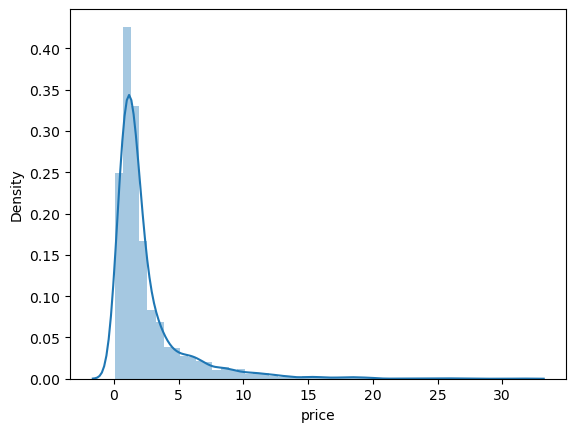

In [8]:
sns.distplot(data['price']);

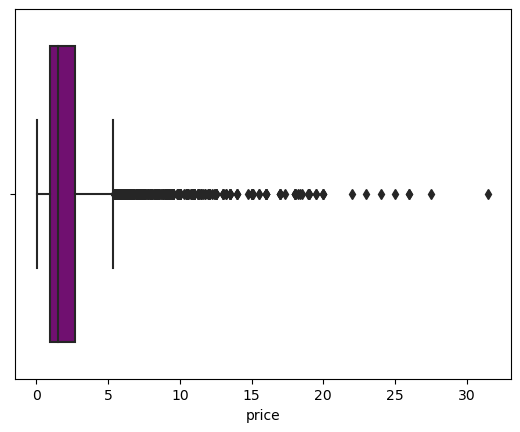

In [11]:
sns.boxplot(data['price'], color='purple');

In [15]:
# calculating IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = round(Q3-Q1,2)
IQR

1.78

In [21]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# according to IQR method, if price is lower than lower_bound or higher than upper_bound, it is an outlier
outlier_df = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

In [23]:
# statistics of the outlier df
outlier_df.describe()['price']

count    439.000000
mean       9.164556
std        4.049009
min        5.400000
25%        6.350000
50%        8.000000
75%       10.550000
max       31.500000
Name: price, dtype: float64

- upon inspection , i got to know that there are some genuine outliers, i.e., some prices actually are very expensive whereas some prices are outliers because of some data error

# price per sqft

In [25]:
data.describe()['price_per_sqft']

count      3817.000000
mean      14011.488342
std       23333.274579
min           2.000000
25%        6806.000000
50%        9011.000000
75%       13875.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

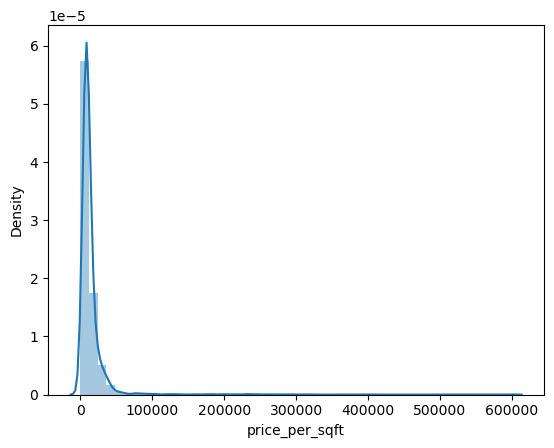

In [27]:
sns.distplot(data['price_per_sqft']);

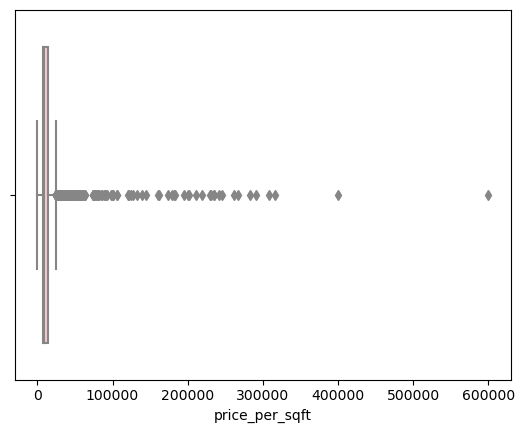

In [28]:
sns.boxplot(data['price_per_sqft'], color='pink');

In [29]:
# IQR analysis to detect outliers
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
IQR = round(Q3-Q1,2)

# calculating lower and upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# according to IQR method, if price is lower than lower_bound or higher than upper_bound, it is an outlier
outlier_df = data[(data['price_per_sqft'] < lower_bound) | (data['price_per_sqft'] > upper_bound)]

outlier_df.describe()['price_per_sqft']

count       372.000000
mean      53662.069892
std       60596.064704
min       24489.000000
25%       28224.750000
50%       33951.000000
75%       43716.750000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [32]:
outlier_df.sort_values(by='price_per_sqft', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
3504,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,...,NaN,400.0,NaN,1.0,0.0,1.0,1.0,0.0,2,122
1398,house,dlf city plots phase 2,dlf phase 2,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12.0,12.0,3+,...,NaN,250.0,NaN,0.0,0.0,1.0,1.0,0.0,2,114
3871,house,independent,jacobpura,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9.0,6.0,2,...,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,1,0
2728,house,ansal,c block sushant lok phase 1,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8.0,8.0,3+,...,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,1,53
1306,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12.0,12.0,3+,...,NaN,232.0,NaN,1.0,0.0,1.0,1.0,1.0,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,house,independent,block g sector-57,1.35,24545.0,550.0,Plot area 550(51.1 sq.m.),5.0,3.0,2,...,NaN,550.0,NaN,NaN,NaN,NaN,NaN,NaN,1,21
20,house,independent,sector 46,2.25,24510.0,918.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq...,4.0,3.0,3,...,NaN,90.0,85.0,0.0,0.0,0.0,1.0,0.0,1,35
1485,house,independent,sector 46,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),5.0,4.0,3+,...,NaN,1449.0,NaN,0.0,0.0,1.0,0.0,0.0,2,73
953,house,independent,sector 55,3.55,24500.0,1449.0,Plot area 161(134.62 sq.m.),4.0,4.0,3+,...,NaN,1449.0,NaN,NaN,NaN,NaN,NaN,NaN,2,27


- if the area is less than 1000, it is in square yards.
- but we have calculated price_per_sqft assuming that area is in sqft and price is in crores
- so, converting the areas in sq yards to sqft

In [34]:
outlier_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
0,house,independent,laxman vihar,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2.0,3.0,0,...,NaN,160.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0
13,house,dlf city plots,dlf phase 1,13.50,29880.0,4518.0,Plot area 502(419.74 sq.m.),5.0,5.0,2,...,NaN,4518.0,NaN,0.0,0.0,1.0,1.0,1.0,2,104
19,house,international city by sobha phase 2,sector 109,6.44,26502.0,2430.0,Plot area 270(225.75 sq.m.),4.0,5.0,3+,...,NaN,2430.0,NaN,1.0,1.0,1.0,1.0,0.0,0,138
20,house,independent,sector 46,2.25,24510.0,918.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq...,4.0,3.0,3,...,NaN,90.0,85.0,0.0,0.0,0.0,1.0,0.0,1,35
30,house,secter 16a daultabad faridabad house no 313,daulatabad,0.48,60000.0,80.0,Plot area 80(7.43 sq.m.),2.0,2.0,0,...,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,house,emaar mgf marbella,sector 66,19.00,31666.0,6000.0,Plot area 9000(836.13 sq.m.)Carpet area: 6000 ...,5.0,6.0,3+,...,NaN,NaN,6000.0,1.0,1.0,1.0,0.0,0.0,2,110
3952,house,independent,c block sushant lok phase 1,6.50,35400.0,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,5.0,4.0,3+,...,NaN,215.0,NaN,1.0,0.0,1.0,0.0,0.0,2,54
3953,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13.0,13.0,3+,...,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,2,7
3965,flat,dlf the crest,sector 54,11.00,35222.0,3123.0,Super Built up area 3123(290.14 sq.m.),4.0,6.0,3,...,3123.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2,125


In [35]:
outlier_df['area'] = outlier_df['area'].apply(lambda x: x*9 if x<1000 else x)

In [39]:
outlier_df['price_per_sqft'] = (outlier_df['price'] * 10000000)/ outlier_df['area']

In [40]:
outlier_df['price_per_sqft'].describe()

count      372.000000
mean     28619.097162
std      12700.488426
min       2723.311547
25%      25000.000000
50%      29494.949495
75%      35423.255324
max      82539.682540
Name: price_per_sqft, dtype: float64

- now the descriptive statistics look reasonable
- mean price_per_sqft could possibly be rs. 29619 in a metropolitan area like Gurgaon

In [41]:
# updataing the original dataframe with the updated price_per_sqft values
data.update(outlier_df)

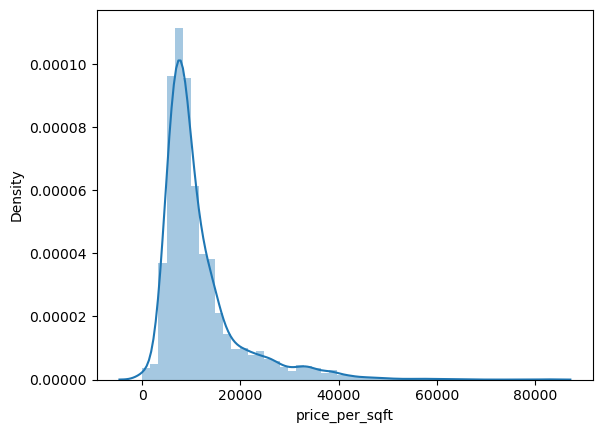

In [43]:
sns.distplot(data['price_per_sqft']);

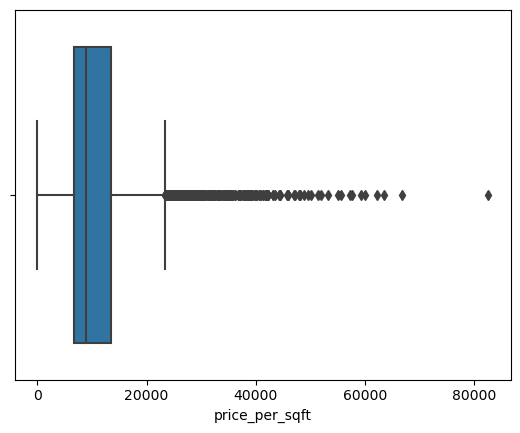

In [44]:
sns.boxplot(data['price_per_sqft']);

In [47]:
data[data['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
693,house,emaar the palm springs,sector 54,14.00,62222.222222,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,...,NaN,2250.0,NaN,0.0,0.0,1.0,1.0,0.0,2.0,160.0
977,house,independent,dlf phase 2,16.00,59259.259259,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,...,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1769,house,independent,dlf phase 1,26.00,82539.682540,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,...,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1972,house,cloudnine cottages,sohna road,5.50,55000.000000,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,...,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2244,house,unitech escape,sector 50,10.80,60000.000000,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,...,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,103.0
2246,house,project housing board colony,sector 31,8.00,63492.063492,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,...,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2367,house,independent,dlf phase 1,14.75,51863.572433,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,...,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
2401,house,nul,dlf phase 4,12.50,51440.329218,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,...,NaN,2430.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,137.0
2768,house,malibu towne,malibu town,8.50,53125.000000,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,...,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,99.0
2791,house,dlf city plots,dlf phase 1,26.00,57205.720572,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,...,NaN,4545.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,138.0


- there are 13 values with price_per_sqft more than 50000
- let's just consider them as outliers and drop them

In [49]:
# dropping rows where price_per_Sqft > 50000
data = data[data['price_per_sqft'] <= 50000]

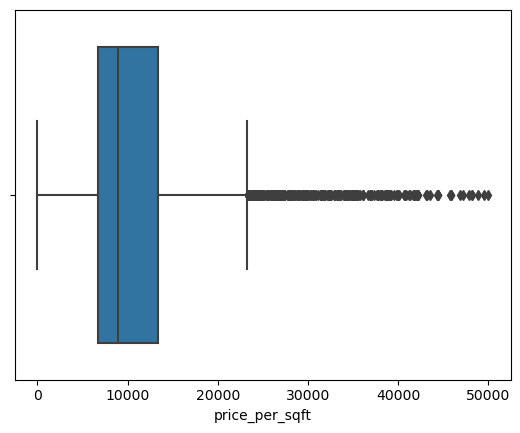

In [51]:
sns.boxplot(data['price_per_sqft']);

- now the boxplot seems a bit less compact due to lesser outliers

# Area

In [55]:
data['area'].describe().round(2)

count       3804.00
mean        4817.56
std       119682.28
min          145.00
25%         1245.00
50%         1742.50
75%         2340.25
max      7250000.00
Name: area, dtype: float64

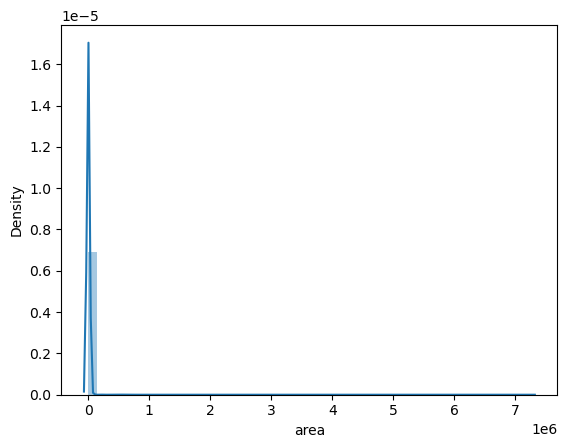

In [56]:
sns.distplot(data['area']);

In [64]:
data[data['area'] > 200000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
139,flat,signature the roselia,sector 95a,0.45,7.0,569243.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,...,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
564,flat,signature global solera 2,sector 107,0.51,9.0,514396.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,...,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2926,flat,ramsons kshitij,sector 95,0.31,5.0,607936.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,...,NaN,NaN,607936.0,0.0,0.0,0.0,1.0,1.0,0.0,65.0
3359,flat,hcbs sports ville,sohna road,0.35,4.0,737147.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,...,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0


- for rows 139, 564, 2926 and 3359, the area seems exorbitantly high (>500000 sq.ft.).
- for these, price_per_sqft values are 7,9,5 and 4
- also none of these properties have any extra room like pooja , servant or study room or others
- only property in row 3359 is furnished, but it is priced at 35 lakhs for a built up area of 7,34,147 sq.ft. 
- these all points indicate that these properties are clearly outliers because of data errors, so drop them

In [63]:
data.loc[139,'area'] = 569243
data.loc[141,'area'] = 2844
data.loc[564,'area'] = 514396
data.loc[1039,'area'] = 1800
data.loc[2926,'area'] = 607936
data.loc[2957,'area'] = 10889
data.loc[3359,'area'] = 737147

In [66]:
# dropping rows with index 139,564, 2926 and 3359
data = data.drop(index=[139,564,2926,3359])

In [70]:
data['area'].max()

98978.0

In [ ]:
data[data['area'] >=50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
47,house,ganpati heights apartment,prem nagar,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
550,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,...,NaN,NaN,64529.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0
1406,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,...,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
1601,house,independent,mayfield garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8.0,8.0,2,...,NaN,8260.0,4860.0,1.0,0.0,0.0,0.0,0.0,2.0,49.0
1740,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,...,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2295,house,independent,dlf phase 1,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.0,1.0,1.0,1.0,0.0,0.0,2.0,60.0
2850,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,...,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
3014,house,dlf city plot phase 4,dlf phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0


- 550,1406, 1740, 2850
- properties in these rows are priced in lacs(range - 38,38,46,33 respectively)
- having more than 50000 sqft area in properties of this price range is impossible
- so dropping these rows

In [73]:
data = data.drop(index=[550,1406, 1740, 2850])

In [74]:
data[data['area'] >=50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
47,house,ganpati heights apartment,prem nagar,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
1601,house,independent,mayfield garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8.0,8.0,2,...,NaN,8260.0,4860.0,1.0,0.0,0.0,0.0,0.0,2.0,49.0
2295,house,independent,dlf phase 1,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.0,1.0,1.0,1.0,0.0,0.0,2.0,60.0
3014,house,dlf city plot phase 4,dlf phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0


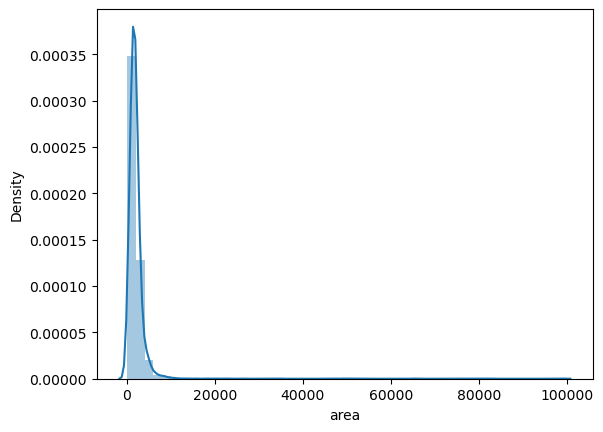

In [76]:
sns.distplot(data['area']);

In [77]:
data[data['area']> 30000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
47,house,ganpati heights apartment,prem nagar,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,...,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
1466,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,...,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
1601,house,independent,mayfield garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8.0,8.0,2,...,NaN,8260.0,4860.0,1.0,0.0,0.0,0.0,0.0,2.0,49.0
1857,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,...,NaN,NaN,48811.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0
2295,house,independent,dlf phase 1,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,...,NaN,NaN,11000.0,1.0,1.0,1.0,0.0,0.0,2.0,60.0
2542,house,independent,dlf phase 2,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,...,NaN,5800.0,5200.0,0.0,1.0,1.0,0.0,0.0,1.0,109.0
3014,house,dlf city plot phase 4,dlf phase 4,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,...,NaN,NaN,7250.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3627,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,...,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0


- 1466, 1857, 3627 
- data in these rows doesn't make sense
- sqft >30000 when the prices are 21,28 and 24 lakhs respectively

In [78]:
data= data.drop(index=[1466, 1857, 3627])

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [86]:
data.loc[21,'built_up_area'] = 25649.968
data.loc[21, 'carpet_area'] = 20250.037
data.loc[21,'area'] = 25649.968

In [88]:
data.loc[47, 'area'] = 82805
data.loc[47, 'built_up_area'] = 82805

In [89]:
data.loc[1223, 'built_up_area'] = 19440.053
data.loc[1223, 'carpet_area'] = 15480.01
data.loc[1223, 'area'] = 19440.053

In [101]:
data[data['area'] > 20000].shape#[['property_type', 'price', 'price_per_sqft', 'bedroom', 'bathroom', 'balcony']]

(8, 23)

In [96]:
data.loc[1601, 'built_up_area'] = 74339.978
data.loc[1601, 'area'] = 74339.978
data.loc[1601, 'carpet_area'] = 43740.011

In [94]:
data.loc[1814, 'built_up_area'] = 23940.013
data.loc[1814, 'area'] = 23940.013
data.loc[1814, 'carpet_area'] = 22500.017

In [93]:
data.loc[2295, 'area'] = 98999.99
data.loc[2295, 'carpet_area'] = 98999.99

In [92]:
data.loc[2542, 'built_up_area'] = 52200.014
data.loc[2542, 'area'] = 52200.014
data.loc[2542, 'carpet_area'] = 46799.975

In [90]:
data.loc[3014, 'area'] = 65249.964
data.loc[3014, 'carpet_area'] = 65249.964

In [ ]:
data.loc[21, 'area'] = 1935.028
data.loc[1223, 'area'] = 2159.994
data.loc[1814, 'area'] = 27899
data.loc[1223, 'area'] = 2159.994
data.loc[1223, 'area'] = 2159.994

In [107]:
data[data['area'] > 20000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
21,house,independent,sushant lok phase 1,5.50,2716.0,25649.968,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8.0,7.0,3+,3.0,East,moderately old,NaN,25649.968,20250.037,1.0,0.0,1.0,1.0,1.0,2.0,123.0
47,house,ganpati heights apartment,prem nagar,1.25,151.0,82805.000,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,old,NaN,82805.000,NaN,0.0,0.0,0.0,0.0,1.0,1.0,7.0
1601,house,independent,mayfield garden,5.50,1087.0,74339.978,Plot area 5620(4699.04 sq.m.)Built Up area: 8260 sq.yards (6906.41 sq.m.)Carpet area: 4860 sq.yards (4063.58 sq.m.),8.0,8.0,2,3.0,North-East,relatively new,NaN,74339.978,43740.011,1.0,0.0,0.0,0.0,0.0,2.0,49.0
1814,house,independent,sector 57,6.25,2778.0,23940.013,Plot area 3100(2591.99 sq.m.)Built Up area: 2660 sq.yards (2224.1 sq.m.)Carpet area: 2500 sq.yards (2090.32 sq.m.),9.0,9.0,3+,3.0,North-East,new,NaN,23940.013,22500.017,0.0,0.0,1.0,0.0,0.0,2.0,61.0
2295,house,independent,dlf phase 1,18.40,1859.0,98999.990,Plot area 502(419.74 sq.m.)Carpet area: 11000 sq.yards (9197.4 sq.m.),6.0,8.0,3+,4.0,South,relatively new,NaN,NaN,98999.990,1.0,1.0,1.0,0.0,0.0,2.0,60.0
2542,house,independent,dlf phase 2,7.30,1560.0,52200.014,Plot area 215(179.77 sq.m.)Built Up area: 5800 sq.yards (4849.54 sq.m.)Carpet area: 5200 sq.yards (4347.86 sq.m.),9.0,9.0,2,3.0,North-West,relatively new,NaN,52200.014,46799.975,0.0,1.0,1.0,0.0,0.0,1.0,109.0
3014,house,dlf city plot phase 4,dlf phase 4,13.00,1992.0,65249.964,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,undefined,NaN,NaN,65249.964,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3771,house,independent,ashok vihar phase i,1.45,557.0,26032.000,Plot area 26000(2415.48 sq.m.),4.0,4.0,2,2.0,East,moderately old,NaN,26000.000,NaN,1.0,0.0,1.0,0.0,0.0,1.0,62.0


- There are 8 rows with area >20000
- these are 21, 47, 1601, 1814, 2295, 2542, 3014, 3771

- Row 47
    * area is around 82000 sqft and price is 1.25 crore - illogical - droppig it
    
- an independent house in dlf phase 2 with build_up area of 2500 sqft costs 17 crore
    * so it is not logical to assume that a hosue with 52200 sqft would cost 7.30 cr or a house with 98999 sqft would cost around 18 crores
    
- my conclusion is that there is some kind of error in recording the build_up area of properties at the above mentioned indices. hence it is better to just drop these rows to avoid any risk of faulty analysis.

In [108]:
data = data.drop(index=[ 21, 47, 1601, 1814, 2295, 2542, 3014, 3771])

<AxesSubplot:xlabel='area', ylabel='Density'>

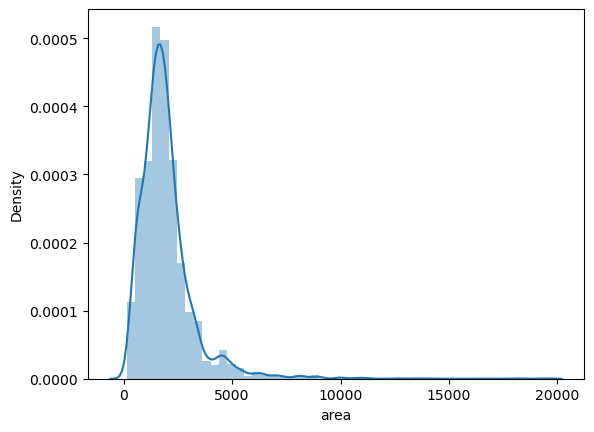

In [109]:
sns.distplot(data['area'])

- now the area in our data has a reasonable range upto 20000.
- majority of the properties lie below 5000 sqft

In [111]:
data[data['area'] > 15000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
1223,house,unitech aspen greens,sector 50,6.95,4490.0,19440.053,Plot area 240(200.67 sq.m.)Built Up area: 2160 sq.yards (1806.04 sq.m.)Carpet area: 1720 sq.yards (1438.14 sq.m.),3.0,3.0,1,2.0,North-East,moderately old,NaN,19440.053,15480.01,0.0,0.0,1.0,0.0,0.0,1.0,160.0
3045,flat,godrej air,sector 85,2.50,1379.0,18129.000,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under construction,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,2.0,44.0


- dropping rows 1223 and 3045 , because again the price of the property seems very paltry as compared to the nearly 19000 sqft of the property

In [112]:
data = data.drop(index=[1223, 3045])

<AxesSubplot:xlabel='area', ylabel='Density'>

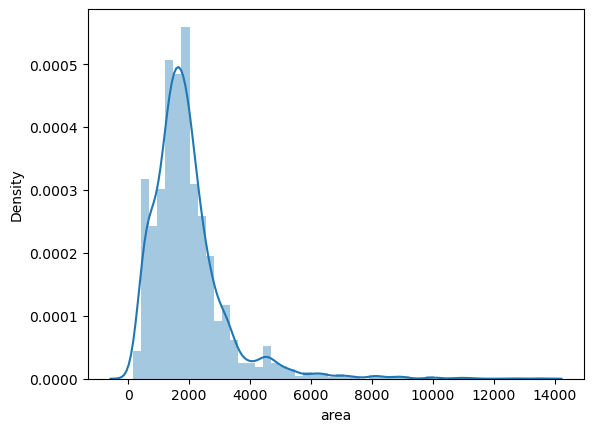

In [113]:
sns.distplot(data['area'])

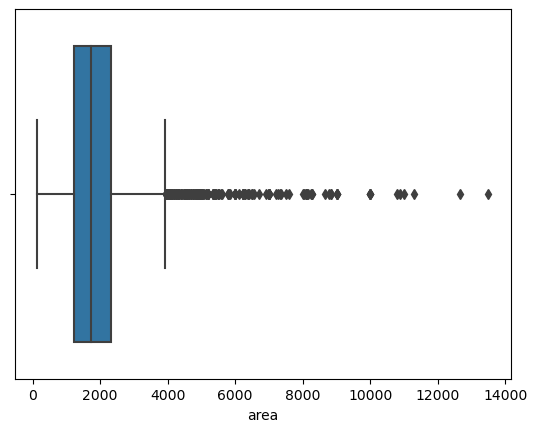

In [115]:
sns.boxplot(data['area']);

In [116]:
data['area'].describe()

count     3783.000000
mean      1942.571768
std       1250.178238
min        145.000000
25%       1241.000000
50%       1736.000000
75%       2320.000000
max      13492.000000
Name: area, dtype: float64

In [117]:
data.shape

(3783, 23)

# bedroom

In [120]:
data['bedRoom'].describe()

count    3783.000000
mean        3.351308
std         1.961698
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

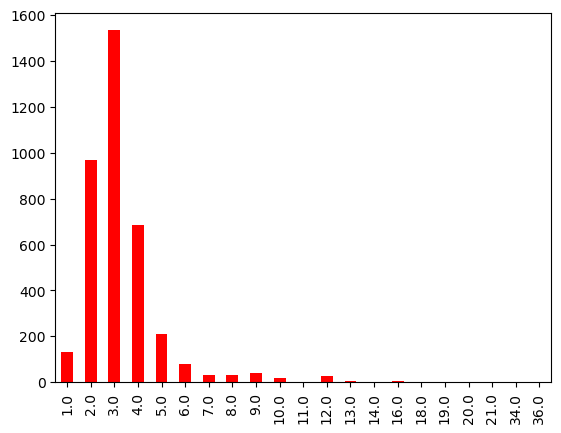

In [124]:
data['bedRoom'].value_counts().sort_index().plot(kind='bar', color='red');

In [126]:
data[data['bedRoom'] > 12].shape

(20, 23)

In [127]:
data[data['bedRoom'] > 12]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
155,house,independent,sushant lok phase 1,13.50,50000.000000,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,relatively new,NaN,2700.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,41.0
208,house,independent,shivaji nagar,4.50,25000.000000,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,relatively new,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,20.0
609,house,manohar nagar,sector 12,5.60,12444.000000,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 500 sq.yards (418.06 sq.m.),34.0,34.0,3+,4.0,NaN,new,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
1012,house,independent,sector 56,12.39,45888.888889,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,new,NaN,2700.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,49.0
1174,house,independent,surat nagar 1,0.80,8888.888889,900.0,Plot area 100(9.29 sq.m.),13.0,6.0,3+,3.0,South,moderately old,NaN,100.0,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2019,house,dlf city plots phase 3,dlf phase 3,5.00,34083.162918,1467.0,Plot area 163(136.29 sq.m.),13.0,13.0,3+,4.0,North,new,NaN,1467.0,NaN,1.0,0.0,0.0,0.0,0.0,2.0,91.0
2299,house,independent,sector 17a,3.87,5160.000000,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.),19.0,17.0,3+,5.0,North-West,relatively new,NaN,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,68.0
2812,house,independent,sushant lok phase 2,9.19,34037.037037,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,2,4.0,West,new,NaN,2700.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,49.0
2871,house,independent,sector 54,5.00,43066.322136,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,relatively new,NaN,1161.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,49.0
2905,house,independent,suncity,5.50,38194.444444,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,relatively new,NaN,1440.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,70.0


- there are 20 flats with > 12 bedrooms
- 609- 34 bedrooms in 12444 sqft area doesn't make sense
- since we'll  be using bedroom as an input feature for our predictive model, we are only keeping properties wihth <=12 bedrooms

In [130]:
data = data[data['bedRoom'] <=12]

In [131]:
data['bedRoom'].describe()

count    3763.000000
mean        3.272655
std         1.581749
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bedRoom, dtype: float64

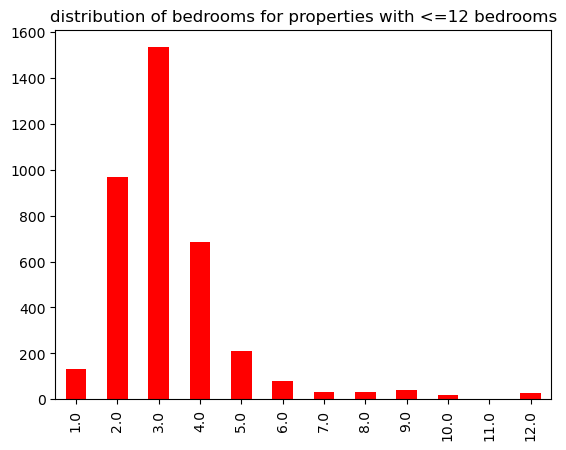

In [135]:
data['bedRoom'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('distribution of bedrooms for properties with <=12 bedrooms');

# bathroom

In [136]:
data['bathroom'].describe()

count    3763.000000
mean        3.315706
std         1.619011
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: bathroom, dtype: float64

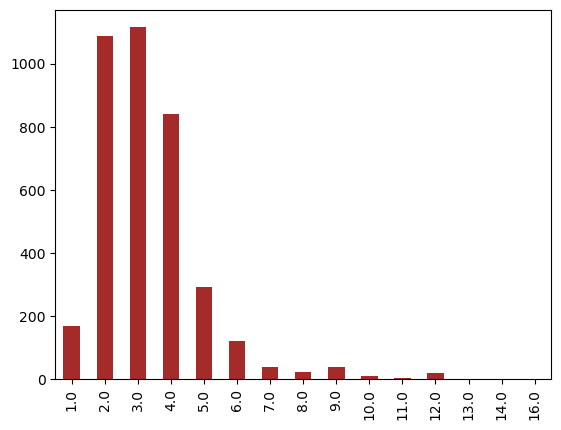

In [139]:
data['bathroom'].value_counts().sort_index().plot(kind='bar', color='brown');

In [140]:
data[data['bathroom']>10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
106,house,independent,sushant lok phase 3,6.95,38611.111111,1800.0,Plot area 192(160.54 sq.m.),12.0,12.0,3+,4.0,East,new,NaN,1728.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,73.0
193,house,dlf city phase 1,sector 26,9.25,47803.617571,1935.0,Plot area 1935(179.77 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),12.0,12.0,3+,4.0,North-East,new,NaN,7000.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,43.0
260,house,luxury dlf city floors,dlf phase 1,8.25,45833.333333,1800.0,Plot area 200(167.23 sq.m.),12.0,12.0,3+,4.0,North,new,NaN,1800.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,105.0
1045,house,independent,sector 31,9.25,39529.914530,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 sq.yards (219.07 sq.m.)Carpet area: 260 sq.yards (217.39 sq.m.),12.0,12.0,3+,4.0,North-East,new,NaN,262.0,260.0,1.0,0.0,1.0,0.0,1.0,2.0,49.0
1306,house,uppal southend,sector 49,6.75,32327.586207,2088.0,Plot area 232(21.55 sq.m.),12.0,12.0,3+,NaN,West,moderately old,NaN,232.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,49.0
1398,house,dlf city plots phase 2,dlf phase 2,10.00,44444.444444,2250.0,Plot area 250(23.23 sq.m.),12.0,12.0,3+,4.0,North,relatively new,NaN,250.0,NaN,0.0,0.0,1.0,1.0,0.0,2.0,114.0
1423,house,independent,sector 27,8.25,45833.333333,1800.0,Plot area 210(175.59 sq.m.)Built Up area: 205 sq.yards (171.41 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),12.0,12.0,3+,4.0,East,new,NaN,205.0,200.0,1.0,0.0,1.0,0.0,0.0,2.0,40.0
1494,house,independent,sector 56,11.95,43533.697632,2745.0,Plot area 305(255.02 sq.m.),12.0,12.0,3+,4.0,West,relatively new,NaN,2745.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,21.0
1722,house,independent,sector 39,7.00,10000.000000,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),10.0,11.0,3+,4.0,South-East,relatively new,NaN,7000.0,NaN,1.0,0.0,0.0,0.0,0.0,2.0,38.0
1825,house,independent,sushant lok phase 1,2.25,7500.000000,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.),11.0,11.0,3+,5.0,West,new,NaN,3000.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,28.0


- even though there are only  a few properties with more than 10 bedrooms, they all seem genuine properties.
- so , I am keeping them

# super built up area

In [141]:
data['super_built_up_area'].describe()

count     1894.000000
mean      1921.276426
std        765.367714
min         89.000000
25%       1466.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

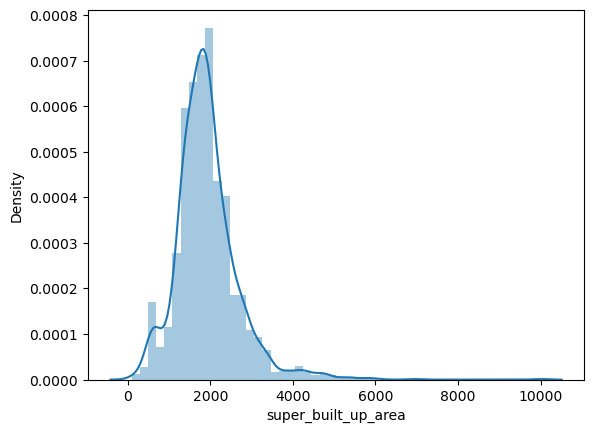

In [142]:
sns.distplot(data['super_built_up_area']);

In [144]:
data.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'pooja room', 'store room', 'servant room', 'study room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

# built up area

In [145]:
data['built_up_area'].describe()

count     1746.000000
mean      1894.265533
std       1425.301851
min          2.000000
25%       1050.000000
50%       1620.000000
75%       2361.500000
max      13500.000000
Name: built_up_area, dtype: float64

In [151]:
data.loc[3140, 'area'] = 3811.50
data.loc[3140, 'built_up_area'] = 3811.50

In [149]:
data.loc[2957,'built_up_area'] = 10889

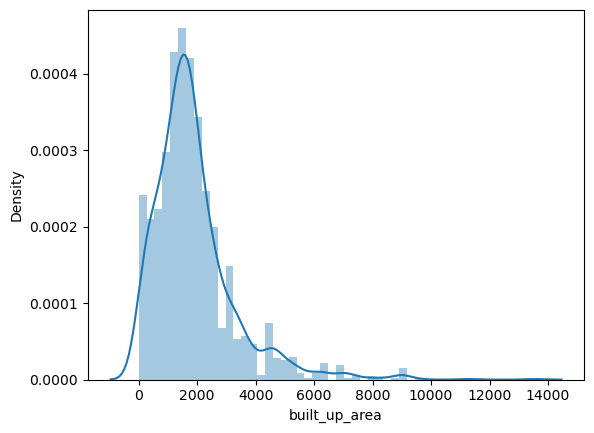

In [148]:
sns.distplot(data['built_up_area']);

In [153]:
data[data['built_up_area']<50]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
276,house,rk excelo,subhash nagar,0.60,13333.333333,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.ft. (2.79 sq.m.)Carpet area: 15 sq.ft. (1.39 sq.m.),5.0,3.0,2,3.0,North,moderately old,NaN,30.0,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1425,house,independent,huda saraswati vihar,0.65,16049.382716,405.0,Plot area 45(4.18 sq.m.),3.0,3.0,2,3.0,East,old,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0
2180,house,independent,sohna road,0.07,2525.000000,277.0,Plot area 33(27.59 sq.m.),1.0,1.0,0,1.0,NaN,relatively new,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


- a house in row 276 has a built up area of 30 square feet, which is not possible - drop it
- 1425 - house - plot area of 45 square feet - not possible
- 2180 - house - 2916 sqft plot area
- dropping rows 276, 1425 and 2180 because of data entry errors

- for reference , a 1BHK flat has a carpet area of 2000 sqft

In [154]:
data= data.drop(index=[276, 1425, 2180])

In [155]:
data[data['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
439,house,independent,sushant lok phase 1,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,relatively new,NaN,11286.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,42.0
1765,house,independent,laxman vihar phase 2,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,relatively new,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2957,house,independent,sector 50,5.00,232.0,10889.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,new,NaN,10889.0,NaN,1.0,0.0,1.0,1.0,1.0,2.0,0.0


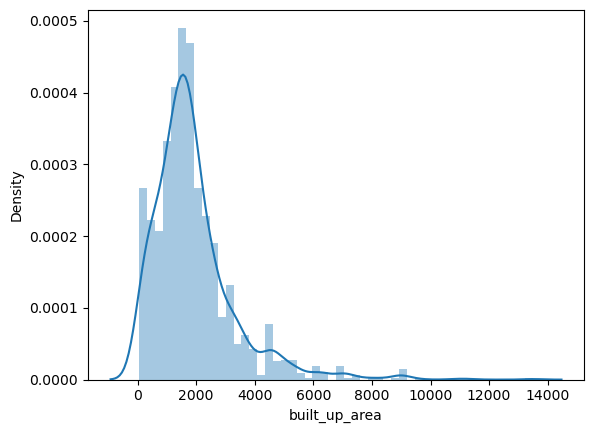

In [156]:
sns.distplot(data['built_up_area']);

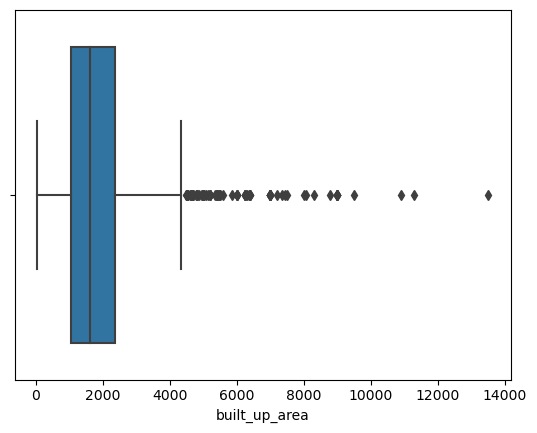

In [157]:
sns.boxplot(data['built_up_area']);

# carpet area

In [158]:
data['carpet_area'].describe()

count     1906.000000
mean      1410.194769
std        958.722591
min         33.000000
25%        822.000000
50%       1272.500000
75%       1760.000000
max      11000.000000
Name: carpet_area, dtype: float64

In [160]:
data[data['carpet_area'] < 1200].shape

(843, 23)

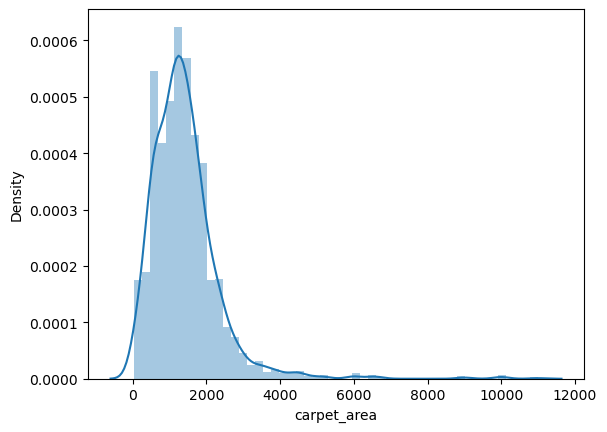

In [161]:
sns.distplot(data['carpet_area']);

In [162]:
data[data['carpet_area'] >10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
3371,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,moderately old,NaN,NaN,11000.0,0.0,0.0,1.0,0.0,0.0,1.0,60.0


# luxury score

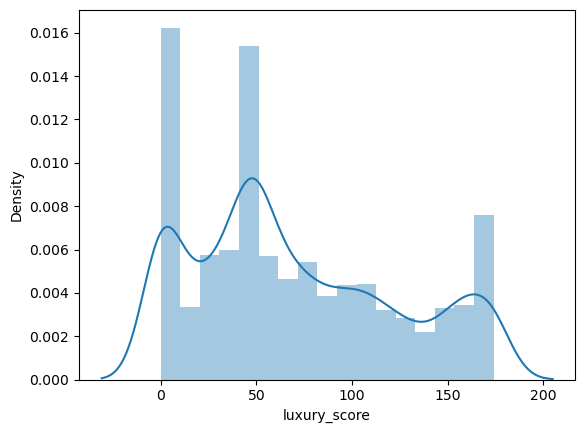

In [163]:
sns.distplot(data['luxury_score']);

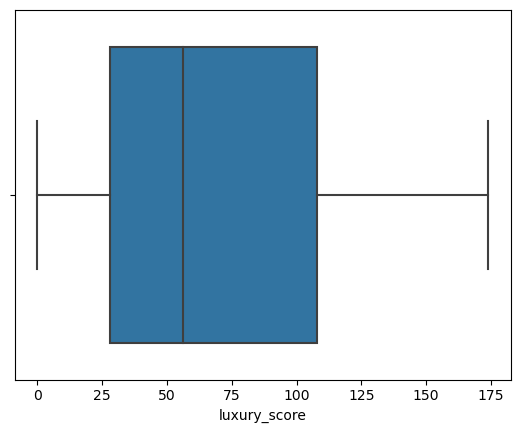

In [164]:
sns.boxplot(data['luxury_score']);

# recalculating price_per_sqft 
because I made some modifications in the area column

In [168]:
data['price_per_sqft'] = round((data['price']*10000000) / data['area'])

In [170]:
data.drop(columns='price_per_Sqft', inplace=True)

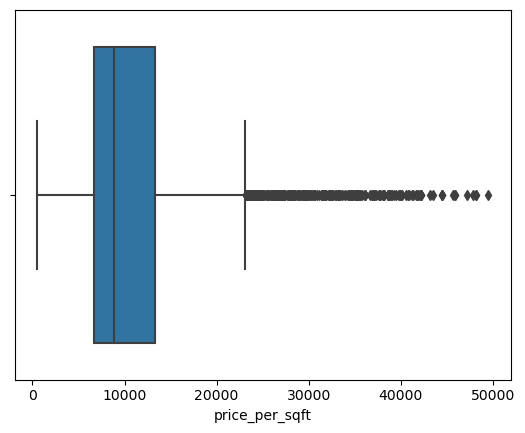

In [172]:
sns.boxplot(data['price_per_sqft']);

In [175]:
data[data['price_per_sqft'] >42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,pooja room,store room,servant room,study room,others,furnishing_type,luxury_score
107,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 sq.yards (96.15 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),9.0,9.0,3+,5.0,East,new,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
141,house,independent,dlf phase 2,13.00,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,relatively new,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
193,house,dlf city phase 1,sector 26,9.25,47804.0,1935.0,Plot area 1935(179.77 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.),12.0,12.0,3+,4.0,North-East,new,NaN,7000.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,43.0
260,house,luxury dlf city floors,dlf phase 1,8.25,45833.0,1800.0,Plot area 200(167.23 sq.m.),12.0,12.0,3+,4.0,North,new,NaN,1800.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,105.0
1205,house,independent,dlf phase 1,19.00,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,moderately old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0
1334,house,sushant lok 1 builder floors,sushant lok phase 1,13.00,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,new,NaN,2700.0,NaN,1.0,0.0,0.0,0.0,0.0,2.0,7.0
1398,house,dlf city plots phase 2,dlf phase 2,10.00,44444.0,2250.0,Plot area 250(23.23 sq.m.),12.0,12.0,3+,4.0,North,relatively new,NaN,250.0,NaN,0.0,0.0,1.0,1.0,0.0,2.0,114.0
1423,house,independent,sector 27,8.25,45833.0,1800.0,Plot area 210(175.59 sq.m.)Built Up area: 205 sq.yards (171.41 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),12.0,12.0,3+,4.0,East,new,NaN,205.0,200.0,1.0,0.0,1.0,0.0,0.0,2.0,40.0
1494,house,independent,sector 56,11.95,43534.0,2745.0,Plot area 305(255.02 sq.m.),12.0,12.0,3+,4.0,West,relatively new,NaN,2745.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,21.0
1673,house,independent,dlf phase 1,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,relatively new,NaN,4500.0,NaN,1.0,0.0,1.0,0.0,0.0,2.0,97.0
